In [1]:
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
import pickle
from testsuite.utilities import Pareto_split
import numpy as np
from testsuite.analysis import load_all, plot_all_pareto_2d, PLOT_STYLE, plot_measure

In [2]:
dir_path = os.getcwd()
result_dirs = sorted(os.listdir("./log_data/"))
result_dirs

['test_function_Saf_Saf_init10_MultiSurrogate_ei',
 'test_function_Saf_Sms_init10_MultiSurrogate_mean',
 'test_function_Saf_init10_MultiSurrogate_ei',
 'test_function_Saf_init10_MultiSurrogate_mean',
 'test_function_SmsEgo_init10_MultiSurrogate_ei',
 'test_function_SmsEgo_init10_MultiSurrogate_mean',
 'test_function_Sms_Saf_init10_MultiSurrogate_mean']

In [3]:
safsaf_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[0]))
safsms_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[1]))
saf_ei_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[2]))
saf_mu_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[3]))
sms_ei_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[4]))
sms_mu_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[5]))
smssaf_results = load_all(os.path.join(dir_path, "log_data/", result_dirs[6]))

In [4]:
print(safsaf_results.keys())
print(safsms_results.keys())
print(saf_ei_results.keys())
print(saf_mu_results.keys())
print(sms_ei_results.keys())
print(sms_mu_results.keys())
print(smssaf_results.keys())

dict_keys(['objective_function', 'limits', 'n_initial', 'seed', 'hypervolume', 'x', 'y', 'log_dir', 'log_filename', 'n_evaluations', 'budget', 'errors', 'train_time', 'error models'])
dict_keys(['objective_function', 'limits', 'n_initial', 'seed', 'hypervolume', 'x', 'y', 'log_dir', 'log_filename', 'n_evaluations', 'budget', 'errors', 'train_time', 'error models'])
dict_keys(['objective_function', 'limits', 'n_initial', 'seed', 'hypervolume', 'x', 'y', 'log_dir', 'log_filename', 'n_evaluations', 'budget', 'errors', 'train_time'])
dict_keys(['objective_function', 'limits', 'n_initial', 'seed', 'hypervolume', 'x', 'y', 'log_dir', 'log_filename', 'n_evaluations', 'budget', 'errors', 'train_time', 'error models'])
dict_keys(['objective_function', 'limits', 'n_initial', 'seed', 'hypervolume', 'x', 'y', 'log_dir', 'log_filename', 'n_evaluations', 'budget', 'errors', 'train_time', 'error models'])
dict_keys(['objective_function', 'limits', 'n_initial', 'seed', 'hypervolume', 'x', 'y', 'log_di

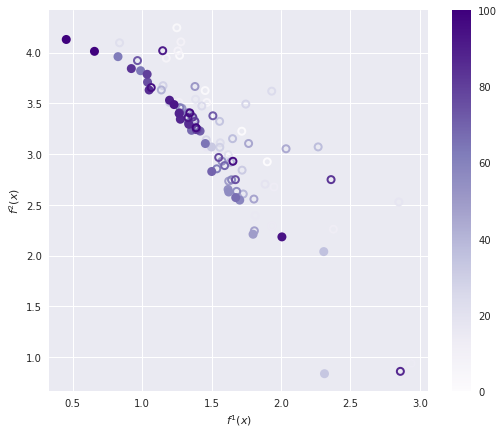

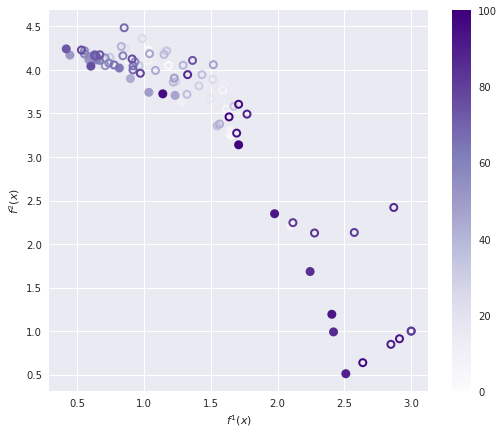

In [5]:
plot_all_pareto_2d(safsms_results, plot_indices=[1])
plot_all_pareto_2d(sms_ei_results, plot_indices=[1])
pass

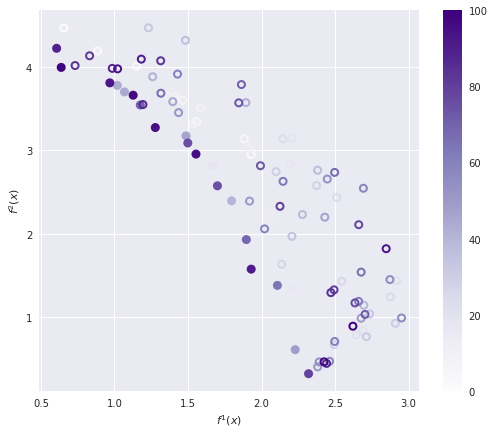

In [6]:
fig_safei = plot_all_pareto_2d(saf_ei_results, plot_indices=[1])

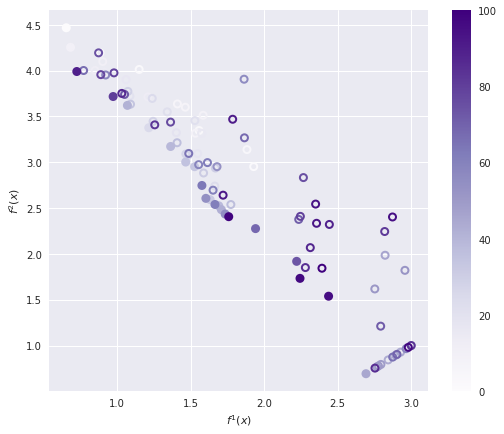

In [7]:
fig_smsmu = plot_all_pareto_2d(sms_mu_results, plot_indices=[0])


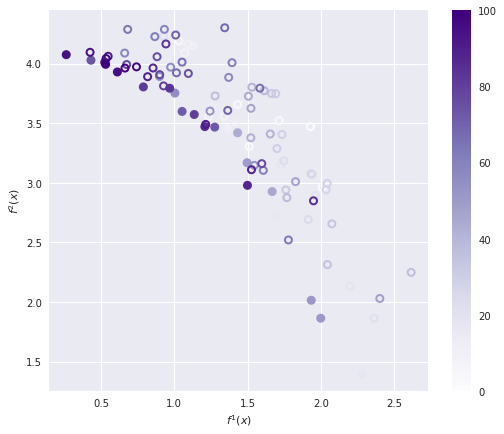

In [12]:
fig_smsmei= plot_all_pareto_2d(sms_ei_results, plot_indices=[0])

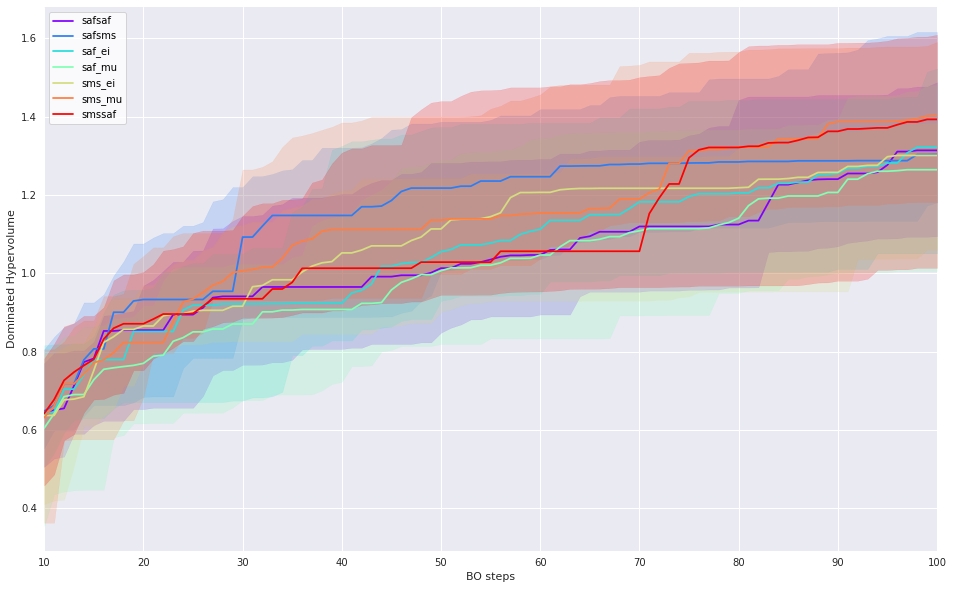

In [13]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(safsaf_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="safsaf", color=colors[0])
plot_measure(safsms_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="safsms", color=colors[1])
plot_measure(saf_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf_ei", color=colors[2])
plot_measure(saf_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="saf_mu", color=colors[3])
plot_measure(sms_ei_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms_ei", color=colors[4])
plot_measure(sms_mu_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="sms_mu", color=colors[5])
plot_measure(smssaf_results, measure="hypervolume", axis=ax_hv, plot_individuals=False, label="smssaf", color=colors[6])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Dominated Hypervolume")
ax_hv.legend()

In [14]:
print(np.sum([len(errors) for errors in safsaf_results["errors"]]), "\t",*[errors for errors in safsaf_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in safsms_results["errors"]]), "\t",*[errors for errors in safsms_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_ei_results["errors"]]), "\t",*[errors for errors in saf_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in saf_mu_results["errors"]]), "\t",*[errors for errors in saf_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_ei_results["errors"]]), "\t",*[errors for errors in sms_ei_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in sms_mu_results["errors"]]), "\t",*[errors for errors in sms_mu_results["errors"] if len(errors)>0])
print(np.sum([len(errors) for errors in smssaf_results["errors"]]), "\t",*[errors for errors in smssaf_results["errors"] if len(errors)>0])

0 	
0 	
0 	
0 	
1 	 ['Error#02: Took 2 attempts to find unique solution at eval 13 seed:8']
0 	
1 	 ['Error#02: Took 3 attempts to find unique solution at eval 12 seed:8']


In [15]:
print(np.mean([times for times in safsaf_results["train_time"]]))
print(np.mean([times for times in safsms_results["train_time"]]))
print(np.mean([times for times in saf_ei_results["train_time"]]))
print(np.mean([times for times in saf_mu_results["train_time"]]))
print(np.mean([times for times in sms_ei_results["train_time"]]))
print(np.mean([times for times in sms_mu_results["train_time"]]))
print(np.mean([times for times in smssaf_results["train_time"]]))

15288.581276198229
8026.858748179216
14493.961210946241
14883.144160588583
3922.7755219425476
5620.834043521148
20389.073493090542


In [16]:
from pymoo.factory import get_performance_indicator
import wfg

In [17]:
N= 500

## establish objective function
kfactor = 2
lfactor = 3
M = 3 # number of "underlying positional parameters" +1 
k = kfactor*(M-1) # position related parameers (must be devisible by M-1)
l = lfactor*2 # distance-related parameters, muist be even for WFG2 & WFG3

n_obj = 2 # must be from 1:M 
n_dim = l+k

x_limits = np.zeros((2, n_dim))
x_limits[1] = np.array(range(1,n_dim+1))*2

# fun = BM.wfg
fun =wfg.WFG4
args = [k, n_obj] # number of objectives as argument


y = np.zeros((N, n_obj))
for n in range(N):
    z = wfg.random_soln(k, l, fun.__name__)
    y[n,:] = fun(z, k, n_obj)

In [18]:
igdp = get_performance_indicator("igd+", y)

def extract_performance(z, indicator):
    ANS  = []
    for i in range(9, len(z)):
        ans = indicator.calc(z[:i])
        ANS.append(ans)

    return ANS

In [19]:
safsaf_results['igd'] = [extract_performance(safsaf_results["y"][i], igdp) for i in range(len(safsaf_results["y"]))]
safsms_results['igd'] = [extract_performance(safsms_results["y"][i], igdp) for i in range(len(safsms_results["y"]))]
saf_ei_results['igd'] = [extract_performance(saf_ei_results["y"][i], igdp) for i in range(len(saf_ei_results["y"]))]
saf_mu_results['igd'] = [extract_performance(saf_mu_results["y"][i], igdp) for i in range(len(saf_mu_results["y"]))]
sms_ei_results['igd'] = [extract_performance(sms_ei_results["y"][i], igdp) for i in range(len(sms_ei_results["y"]))]
sms_mu_results['igd'] = [extract_performance(sms_mu_results["y"][i], igdp) for i in range(len(sms_mu_results["y"]))]
smssaf_results['igd'] = [extract_performance(smssaf_results["y"][i], igdp) for i in range(len(smssaf_results["y"]))]

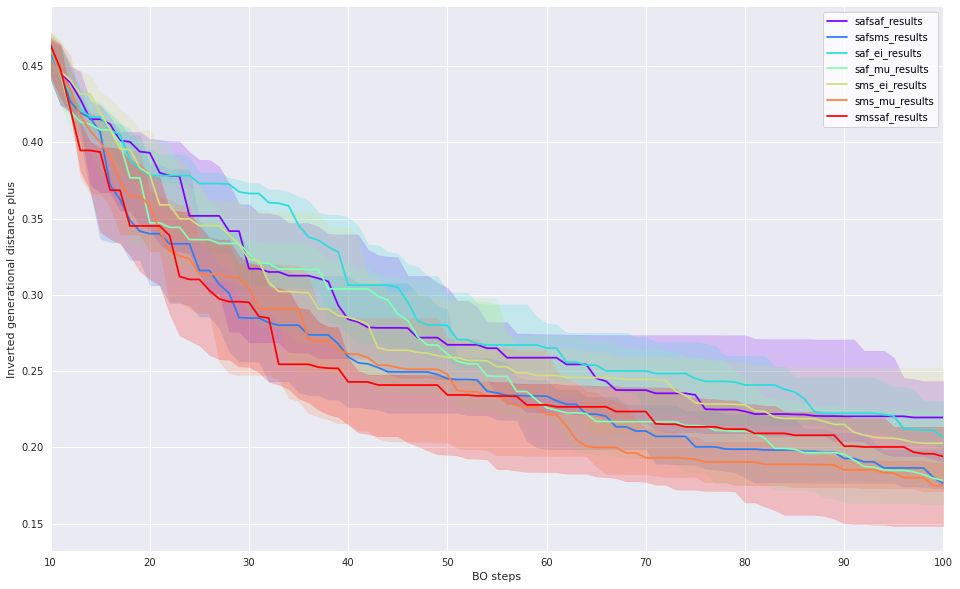

In [20]:
import matplotlib.pyplot as plt
with plt.style.context(PLOT_STYLE["plot_style"]):
    fig_hv = plt.figure(figsize=[16, 10])
    ax_hv = fig_hv.gca()

cmap = PLOT_STYLE['plot_cmap']
colors = cmap(np.linspace(0, 1, len(result_dirs)))

plot_measure(safsaf_results, measure="igd", axis=ax_hv, plot_individuals=False, label="safsaf_results", color=colors[0])
plot_measure(safsms_results, measure="igd", axis=ax_hv, plot_individuals=False, label="safsms_results", color=colors[1])
plot_measure(saf_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf_ei_results", color=colors[2])
plot_measure(saf_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="saf_mu_results", color=colors[3])
plot_measure(sms_ei_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms_ei_results", color=colors[4])
plot_measure(sms_mu_results, measure="igd", axis=ax_hv, plot_individuals=False, label="sms_mu_results", color=colors[5])
plot_measure(smssaf_results, measure="igd", axis=ax_hv, plot_individuals=False, label="smssaf_results", color=colors[6])
ax_hv.set_xlim([10, 100])
ax_hv.set_xlabel("BO steps")
ax_hv.set_ylabel("Inverted generational distance plus")
ax_hv.legend()

In [22]:
print(len(safsaf_results["y"]))
print(len(safsms_results["y"]))
print(len(saf_ei_results["y"]))
print(len(saf_mu_results["y"]))
print(len(sms_ei_results["y"]))
print(len(sms_mu_results["y"]))
print(len(smssaf_results["y"]))

12
13
12
12
14
13
11
